# Model Benchmarking

This notebook will perform exploration via model and model hyperparameter searching of possible shallow models using SKLearn built in algorithms.

I use data constructed by Feature_Engineering.ipynb and model searching functionality from SKL_search.py 

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_context('talk')
import matplotlib.pyplot as plt
import warnings
from SKL_search import *
warnings.filterwarnings("ignore")

In [13]:
#untie local dependency
import os
cwd = os.getcwd().split('\\')
local_repo_path = '\\'.join(cwd[:-1])
raw_data_path = local_repo_path + r'\data\raw'
processed_data_path = local_repo_path + '\data\processed'
feature_path = local_repo_path + r'\\data\\features'

# Choose feature set to benchmark against and construct data sets

In [117]:
output_feature_fname = 'PCA_3_and_Poly'
sj_feature_train = pd.read_csv(feature_path + r'\\sj_train_' + output_feature_fname + '.csv', index_col=0).drop('weekofyear', axis = 1)
sj_feature_test = pd.read_csv(feature_path + r'\\sj_test_' + output_feature_fname + '.csv', index_col=0)
iq_feature_train = pd.read_csv(feature_path + r'\\iq_train_' + output_feature_fname + '.csv', index_col=0).drop('weekofyear', axis = 1)
iq_feature_test = pd.read_csv(feature_path + r'\\iq_test_' + output_feature_fname + '.csv', index_col=0)

In [121]:
from sklearn.model_selection import train_test_split
X_tr_sj, X_val_sj, Y_tr_sj, Y_val_sj = train_test_split(sj_feature_train.drop('total_cases', axis = 1), sj_feature_train['total_cases'], test_size = 0.05, random_state = 4)
X_tr_iq, X_val_iq, Y_tr_iq, Y_val_iq = train_test_split(iq_feature_train.drop('total_cases', axis = 1), iq_feature_train['total_cases'], test_size = 0.05, random_state = 4)

In [122]:
X_tr_sj.head()

,0,1,2,3,4,5,6,7,8,9,...,241,242,243,244,245,246,247,248,249,poly_fit
703,0.842832,1.176615,-0.415366,0.0,0.000000,1.041197,-0.558771,-0.568926,1.132833,0.477651,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,63.845509
618,-0.905974,-0.548026,-0.362509,0.0,1.231243,1.098662,1.419293,1.135343,-0.414904,-0.648319,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,14.085178
490,0.904257,0.916479,0.911203,0.0,-0.099943,-0.303611,-0.107336,-0.064591,0.793128,0.726635,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,65.877086
214,0.331313,0.496300,0.068614,0.0,0.285028,0.017141,-1.623504,-1.484848,0.408323,0.045438,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,13.009322
759,-0.712478,-0.536835,-0.267806,0.0,-2.824151,-1.691607,0.464721,1.481727,-0.414904,-0.231622,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,48.519782


In [17]:
X_tr_iq.head()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,poly_fit
25,0.009583,-0.568236,-0.141054,0.330199,-1.217574,1.663594,1.510102,-2.432264,1.176357,0.752941,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,15.484342
138,0.282340,0.026771,-0.194292,-0.457345,1.542160,0.978802,0.728147,0.296975,0.433499,0.658824,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,9.051434
365,0.484626,0.350501,0.041785,0.737053,-0.897505,-0.288479,-0.065086,-0.975252,-0.052215,-1.082353,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.512889
506,0.020225,0.595573,0.428261,0.276292,-0.198215,0.755760,0.615365,0.885060,0.233499,0.752941,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7.248927
413,0.250054,0.270963,-0.031519,0.244894,-1.016025,-1.061751,-0.929748,-0.995784,-0.366501,-2.258824,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.518898


# Benchmark SJ city

# SKLearn broad model search

In [95]:
from sklearn.ensemble import (ExtraTreesRegressor, RandomForestRegressor, 
                              AdaBoostRegressor, GradientBoostingRegressor)
from sklearn import neighbors
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.neural_network import MLPRegressor

In [ ]:
 neighbors.KNeighborsRegressor(n_neighbors, weights=weights)

In [67]:
models1 = { 
    'RandomForestRegressor': RandomForestRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'SVR': SVR(),
    'NNRegressor': neighbors.KNeighborsRegressor()
}

params1 = {  
    'RandomForestRegressor': { 'n_estimators': [100,100], 'max_depth':[5,10]},
    'GradientBoostingRegressor': { 'n_estimators': [50, 100,150], 'max_features': ['sqrt','log2'] },
    'SVR': [
        {'kernel': ['linear'], 'C': [0.05, 0.01], 'degree':[1], 'epsilon':[0.2, 0.5, 1]}],
    'LinearRegression': {'n_jobs':[-1]},
    'NNRegressor': {'n_neighbors':[125]}
    
}

In [68]:
sj_helper = EstimatorSelectionHelper(models1, params1)
sj_helper.fit(X_tr_sj, Y_tr_sj, scoring='neg_mean_absolute_error', cv = 2)

Running GridSearchCV for RandomForestRegressor.
Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Done   3 out of   8 | elapsed:    1.6s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done   5 out of   8 | elapsed:    2.2s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    2.5s finished


Running GridSearchCV for GradientBoostingRegressor.
Fitting 2 folds for each of 6 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done   8 out of  12 | elapsed:    1.8s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    1.9s finished


Running GridSearchCV for SVR.
Fitting 2 folds for each of 6 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done   8 out of  12 | elapsed:    1.8s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    1.8s finished


Running GridSearchCV for NNRegressor.
Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    1.0s finished


In [69]:
sj_skl_models = sj_helper.score_summary(sort_by='min_score')
sj_skl_models

,estimator,min_score,mean_score,max_score,std_score,C,degree,epsilon,kernel,max_depth,max_features,n_estimators,n_neighbors
12,SVR,-21.6017,-21.4806,-21.3595,0.121103,0.05,1,1,linear,NaN,NaN,NaN,NaN
11,SVR,-21.6061,-21.4863,-21.3664,0.119855,0.05,1,0.5,linear,NaN,NaN,NaN,NaN
10,SVR,-21.6164,-21.4958,-21.3752,0.120635,0.05,1,0.2,linear,NaN,NaN,NaN,NaN
13,SVR,-21.7123,-21.6751,-21.6379,0.0371936,0.01,1,0.2,linear,NaN,NaN,NaN,NaN
14,SVR,-21.7226,-21.6864,-21.6503,0.0361181,0.01,1,0.5,linear,NaN,NaN,NaN,NaN
15,SVR,-21.7503,-21.7086,-21.6669,0.0417067,0.01,1,1,linear,NaN,NaN,NaN,NaN
16,NNRegressor,-24.9398,-24.6115,-24.2831,0.328374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125
7,GradientBoostingRegressor,-25.5292,-24.7101,-23.891,0.819118,NaN,NaN,NaN,NaN,NaN,log2,50,NaN
0,RandomForestRegressor,-26.0909,-25.4028,-24.7147,0.688135,NaN,NaN,NaN,NaN,5,NaN,100,NaN
1,RandomForestRegressor,-26.13,-25.7305,-25.331,0.39949,NaN,NaN,NaN,NaN,5,NaN,100,NaN


In [76]:
def fit_and_predict(train, test, mod):
    mod.fit(train.drop('total_cases', axis = 1), train['total_cases'])
    test_preds = mod.predict(test.drop(['city', 'year', 'weekofyear'], axis = 1))
    train_preds = mod.predict(train.drop('total_cases', axis = 1))
    fig, ax = plt.subplots(figsize = (20,10))
    train_error = np.round(mean_absolute_error(train_preds, train['total_cases']),1)
    pd.DataFrame(train['total_cases']).reset_index(drop = True).plot(ax = ax)
    pd.DataFrame(test_preds).set_index(np.arange(len(train), len(train)+ len(test_preds))).plot(ax = ax)
    pd.DataFrame(train_preds).plot(ax = ax)
    ax.legend(labels = ['True', 'Predicted', 'Fitted'])
    ax.set_title('Mean train error: ' + str(train_error))
    return(mod, train_preds, test_preds)

    

In [148]:
SVR_mod = SVR(C = 0.05, degree = 1, epsilon = 0.2, kernel = 'linear')
GB_mod = GradientBoostingRegressor(n_estimators = 25, max_features = 'sqrt')
RF_mod = RandomForestRegressor(n_estimators = 5, max_depth = 5)
NN_mod = neighbors.KNeighborsRegressor(n_neighbors = 2)
MLP_NN = MLPRegressor((100,100), max_iter = 10000,learning_rate = 'invscaling', activation = 'relu')

# Fit and predict with Gradient Boosted Regressor for sj

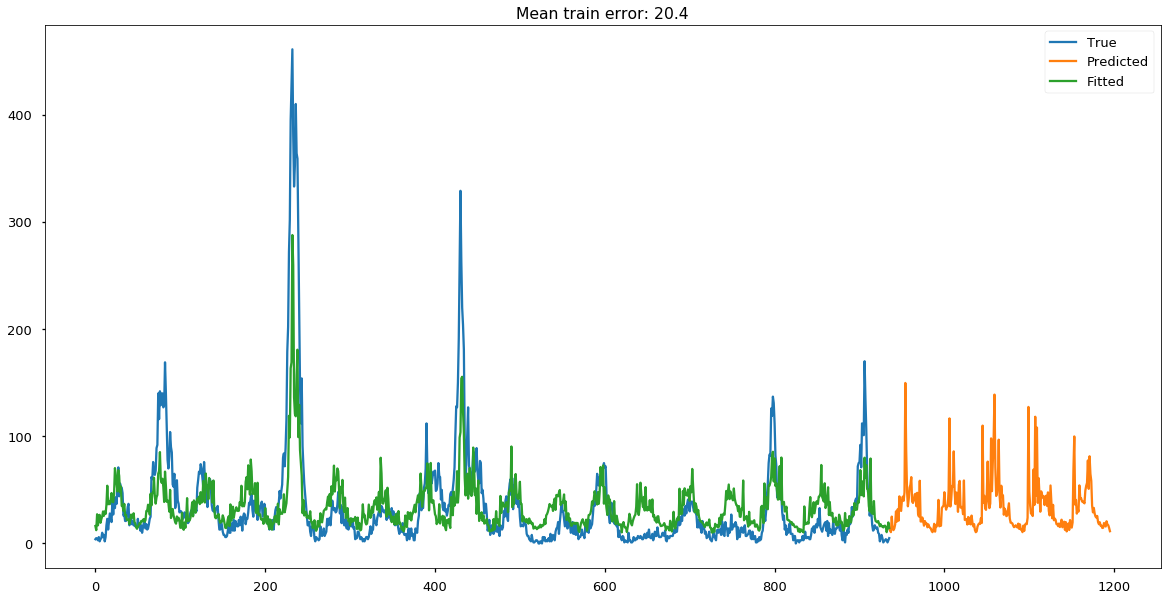

In [149]:
sj_GB_mod, sj_GB_fitted_vals, sj_GB_test_preds = fit_and_predict(sj_feature_train, sj_feature_test, GB_mod)

In [144]:
np.round(sj_GB_test_preds).astype(int)

array([  5,  -3,  24,  21,  20, -12,  15,  62,  24,  16,   8,  58,  10,
        31,  27,  82,  15,  68, 251,  -1,  16,  53,  46,  77,  15,  32,
        57,  -2,  27,  21,  48,  22,  15,  11,  12,  25,   8,  36,  15,
        28,  11,   6,   9, -23,  14,   2,  11, -15,  11,   2,  -3,   4,
         9,  -1,   7,  10,  -5,  21,  15,  13,  40,  -3,  53,  26,  33,
       -11,  35,  20, -20,  97,  56,  33,  54, 128, 239,  46,   2,  42,
       106,  33,  46, 102,  75,  23,  25,  26,  40,  47,  25,  29, -15,
        13,  21,  13,  33,  33,  17,   4,  -9,  18,   7,   3,  -3,   7,
       -12,   5,  11,   7,   5,  25,   9,  39,  18,  40,  19,  66,  35,
        15,  17,  63,  53, 140, 164,  15,  15,  -5,  -3,  63,  -6,  47,
        40,  30,  68,  27,  14,  32, -42,  -2,  23,  26,  28,  39,  23,
        18,  19,  22,  13,  15,   7,  21,  12,   8,  28,  15,  18,  14,
        -4,   9,  13, -11,  30,   4,  21,  53,  60,   9,  15,  -2,  14,
        16,  14,  36, -27,  44,  76,  17,  12,  12,  49,  87,  1

# Fit and predict with Gradient Boosted Regressor for iq

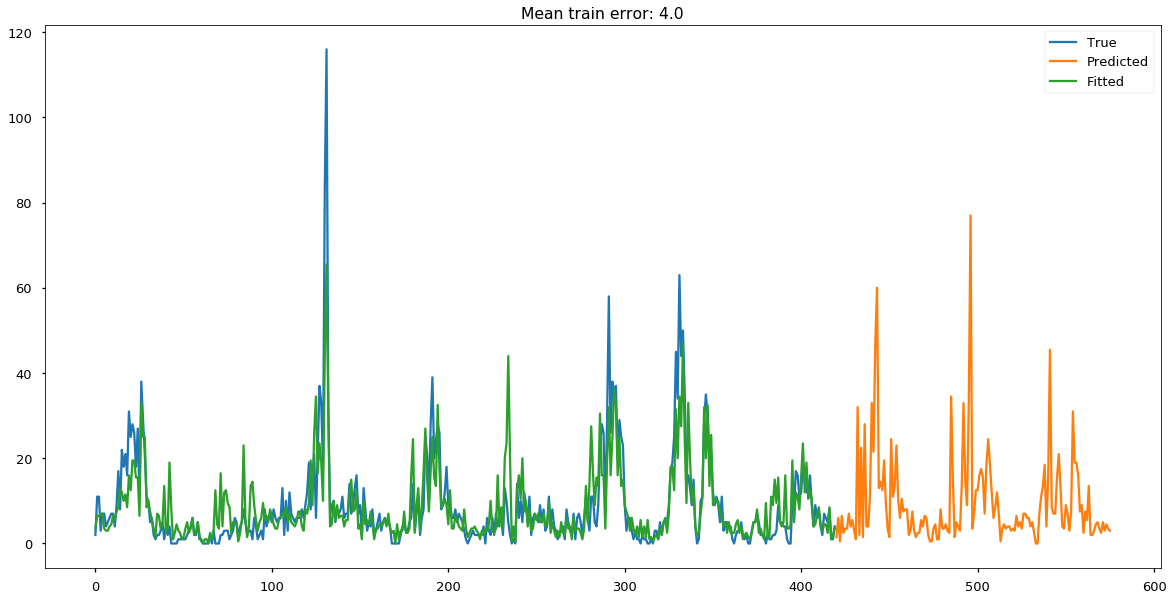

In [93]:
iq_GB_mod, iq_GB_fitted_vals, iq_GB_test_preds = fit_and_predict(iq_feature_train.iloc[100:,], iq_feature_test, NN_mod)

# Fit and predict with SVR for sj

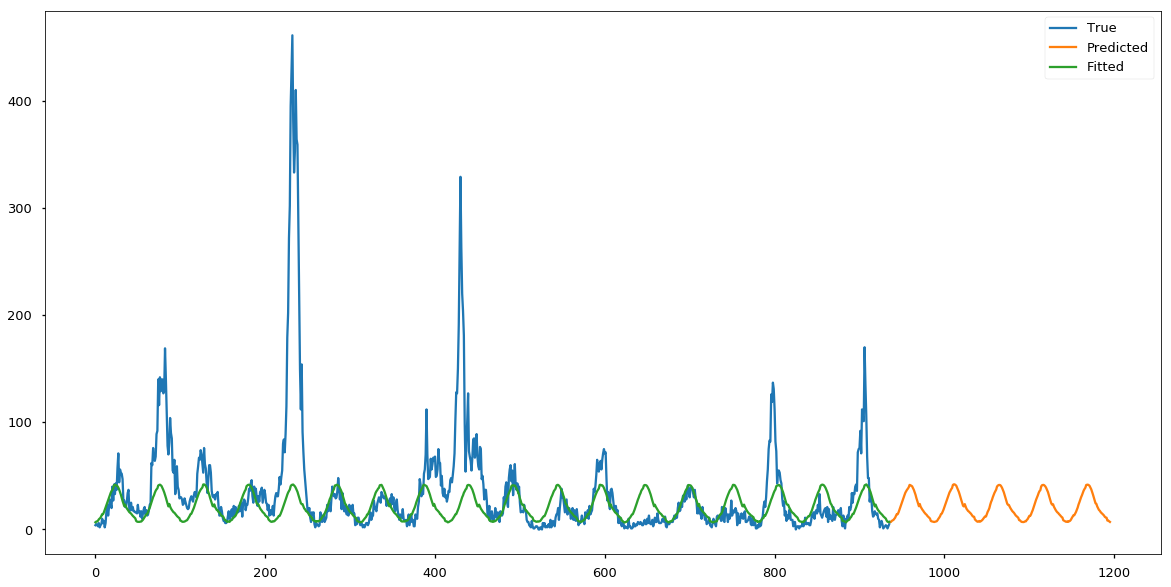

In [394]:
sj_SVR_mod, sj_SVR_fitted_vals, sj_SVR_test_preds = fit_and_predict(sj_feature_train, sj_feature_test, SVR_mod)

# Fit and predict with SVR for iq

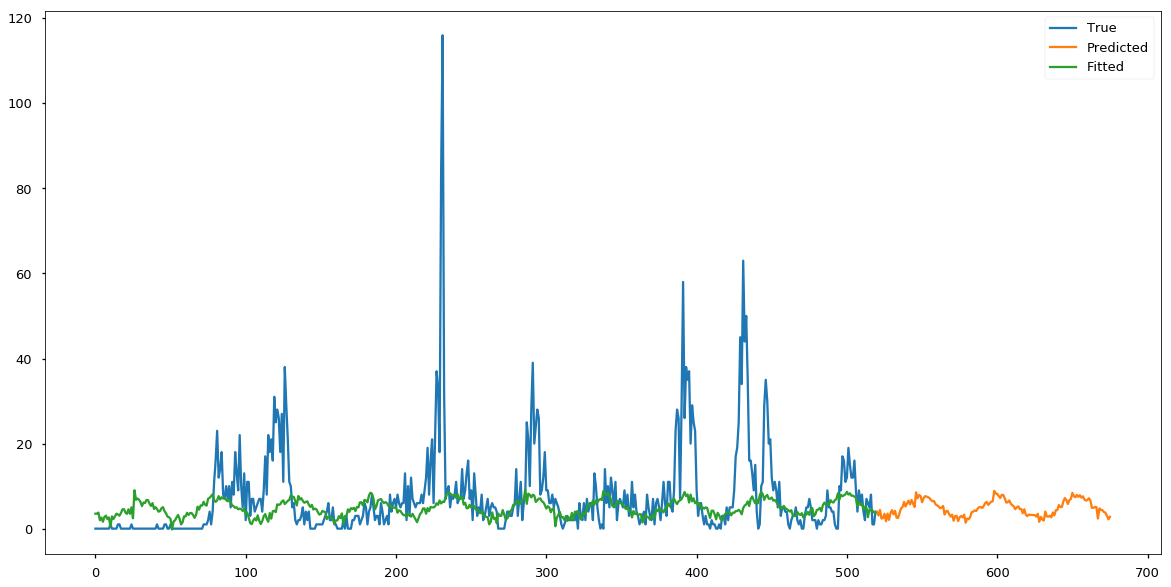

In [396]:
iq_SVR_mod, iq_SVR_fitted_vals, iq_SVR_test_preds = fit_and_predict(iq_feature_train, iq_feature_test, SVR_mod)

# Poisson Regression using Statsmodels

# Negative Binomial GLM using Statsmodels

In [150]:
import statsmodels.api as sm
from statsmodels.tools import eval_measures
import statsmodels.formula.api as smf

In [151]:
X_tr_sj.columns = [str(i) if not i.isdigit() else str('Num') + str(i) for i in list(X_tr_sj.columns)]
X_val_sj.columns = [str(i) if not i.isdigit() else str('Num') + str(i) for i in list(X_tr_sj.columns)]
sj_feature_test.columns = [str(i) if not i.isdigit() else str('Num') + str(i) for i in list(sj_feature_test.columns)]

In [152]:
formula = ' + '.join([str(i) if not i.isdigit() else str('Num') + str(i) for i in list(X_tr_sj.columns)])
formula = 'y ~ ' + formula
X_tr_sj['y'] = Y_tr_sj
X_val_sj['y'] = Y_val_sj

In [153]:
model = smf.glm(formula=formula,
                data=X_tr_sj,
                family=sm.families.NegativeBinomial(alpha = 1e-8))
model = model.fit()

predictions_sj = model.predict(X_val_sj).astype(int)
print ("cv error:", mean_absolute_error(predictions_sj, Y_val_sj))

pred_train_sj = model.predict(X_tr_sj).astype(int)
print ("train error:", mean_absolute_error(pred_train_sj, Y_tr_sj))

cv error: 22.29787234042553
train error: 17.143982002249718


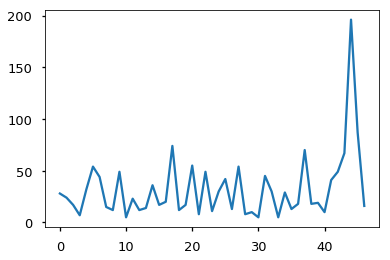

In [159]:
plt.plot(np.arange(predictions_sj.shape[0]),predictions_sj)